In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 6.8MB/s 


In [ ]:
import cv2 
import numpy as np 

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 

In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Shape of image/array: (720, 1280, 3)


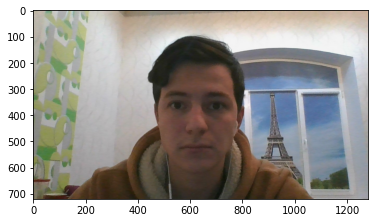

In [ ]:
import matplotlib.pyplot as plt
# load image from file
filename = "/content/drive/MyDrive/WIN_20201216_16_16_09_Pro.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

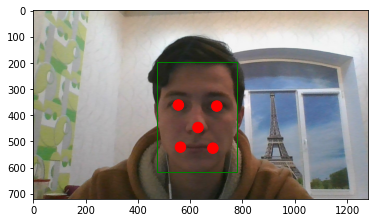

In [ ]:
# нарисовать изображение с обнаруженными объектами
def draw_facebox(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)
  ax = plt.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    ax.add_patch(rect)
  # цикл построения точек черт лица(глаз, носа, кголоков рта)
  for key, value in result['keypoints'].items():
    # create and draw dot
    dot = plt.Circle(value, radius=20, color='red')
    ax.add_patch(dot)
    # show the plot
  plt.show()

detector = mtcnn.MTCNN()
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)


In [ ]:
!pip install deepface

In [ ]:
from deepface import DeepFace
result  = DeepFace.verify(filename, filename)
print("Is verified: ", result["verified"])

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /root/.deepface/weights/vgg_face_weights.h5
580MB [00:03, 172MB/s]


Is verified:  True


Shape of image/array: (1920, 1440, 3)


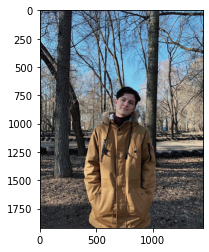

In [ ]:
fileSecond = "/content/drive/MyDrive/Не Я.jpg"
pixels = plt.imread(fileSecond)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [ ]:
result  = DeepFace.verify("/content/drive/MyDrive/WIN_20201216_16_16_09_Pro.jpg", "/content/drive/MyDrive/Не Я.jpg")
print("Is verified: ", result["verified"])

Is verified:  True


Shape of image/array: (879, 701, 3)


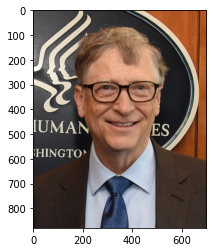

In [ ]:
fileTr = "/content/drive/MyDrive/Bill_Gates.jpg"
pixels = plt.imread(fileTr)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [ ]:
result  = DeepFace.verify(filename, fileTr)
print("Is verified: ", result["verified"])

Is verified:  False


In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2020-12-21 19:15:33--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  11.4MB/s    in 18s     

2020-12-21 19:15:52 (3.32 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
def get_video_verification(path, img, results, frames):
    img = cv2.imread(img)
    img = cv2.resize(img, (400, 400))
    cv2_imshow(img)
    cap = cv2.VideoCapture(path)
    count_frames = 0
    while True:
        if count_frames == (frames + 1):
            return        
        ret, frame = cap.read()
        frame = cv2.resize(frame, (400, 400))
        cv2.putText(frame, ("frame " + str(count_frames + 1)), (10, 30), fontFace = 1, fontScale = 2, color = (0, 0, 255), thickness = 2)
        cv2_imshow(frame)
        if not count_frames == 0:
            verify_images(frame, img, results)
        count_frames += 1
        if cv2.waitKey(10) == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

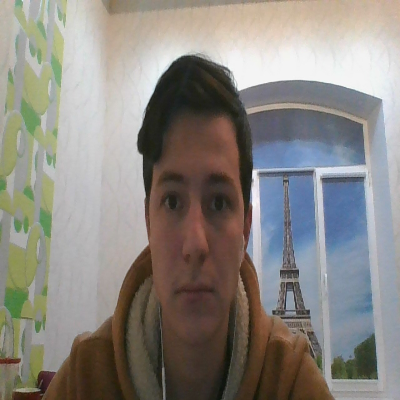

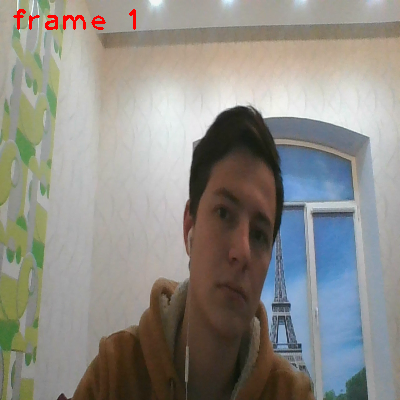

In [ ]:
path = "/content/drive/MyDrive/WIN_20201220_15_36_28_Pro.mp4"
results = []
frames = 0

get_video_verification(path, filename, results, frames)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


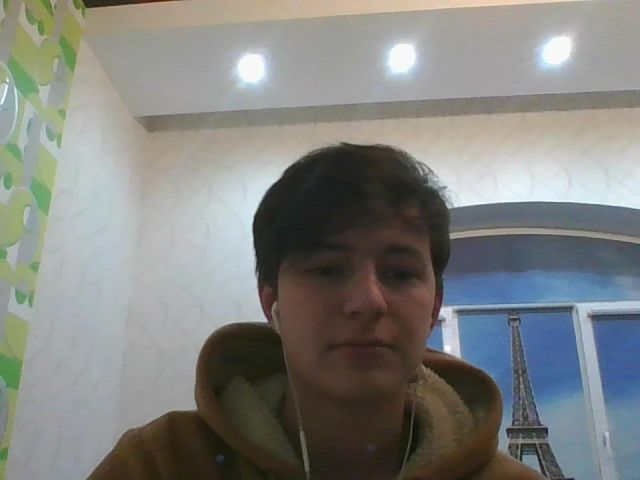

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
result  = DeepFace.verify(filename, "photo.jpg")
print("Is verified: ", result["verified"])

Is verified:  True
